# The Sparks Foundation Internship
## Name-Seraj Ahamad

# Task1
## Prediction Using Supervised Machine Learning
# GRIPFEB2021
## Predict Score of a Student based on Number of Hours Studied
Language-Python
IDE-Jupyter Notebook
Algorithm-Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [7]:
# Importing libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Reading dataset from data source link

In [8]:
s_data = pd.read_csv("http://bit.ly/w-data")
print("Data fetched successfully")

s_data.head(10)

Data fetched successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
s_data.shape

(25, 2)

In [11]:
s_data.select_dtypes(include=['category'])

""
0
1
2
3
4
5
6
7
8
9


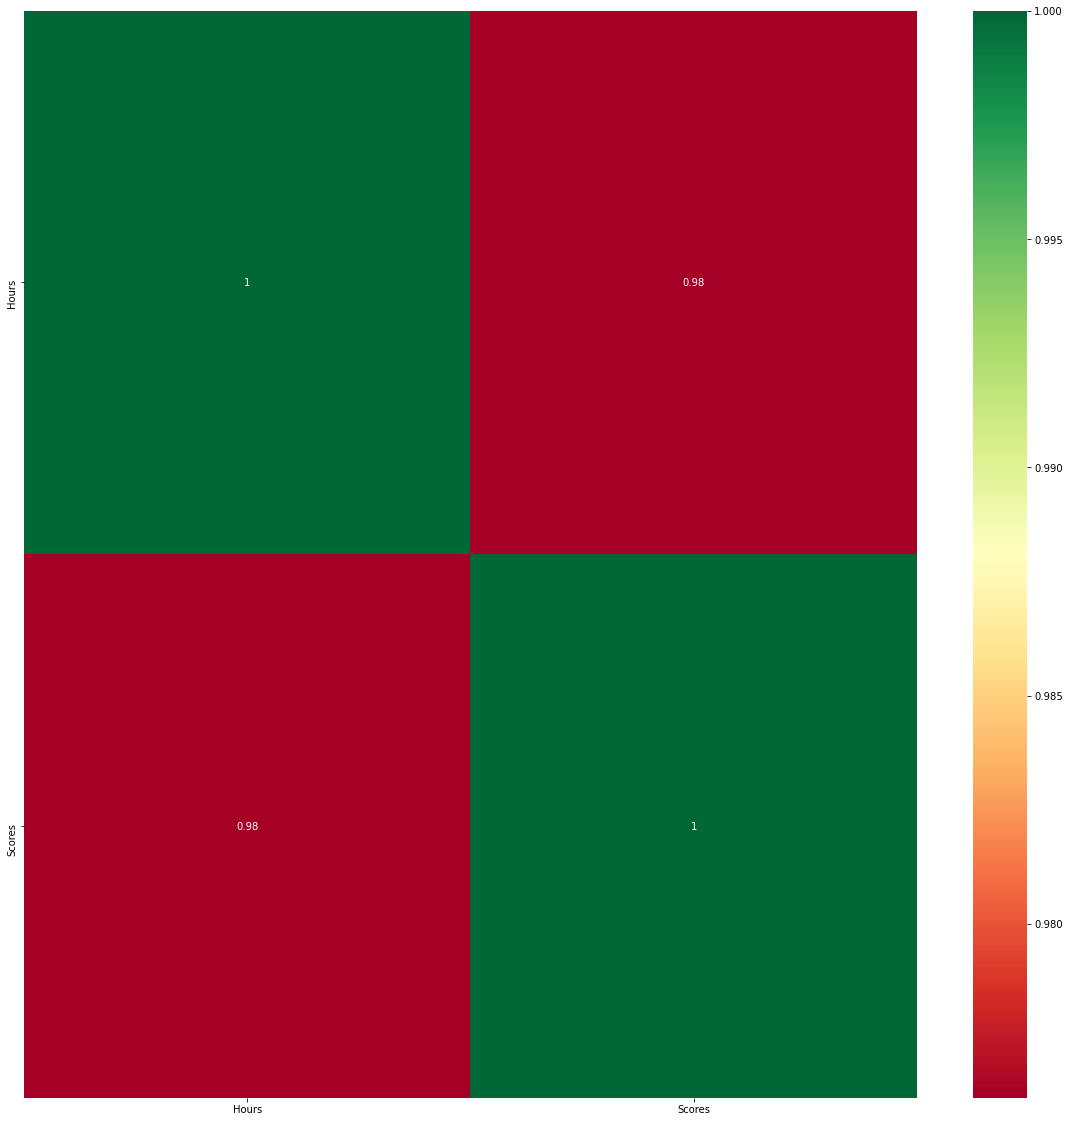

In [12]:
import seaborn as sb
#get correlations of each features in dataset
cormat=s_data.corr()
top_corr_feature=cormat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sb.heatmap(s_data[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

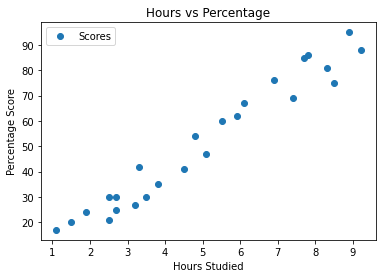

In [13]:
s_data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [14]:
independent = s_data.iloc[:, :-1].values  
depending = s_data.iloc[:, 1].values  

In [15]:
from sklearn.model_selection import train_test_split  
independent_train, independent_test, depending_train, depending_test = train_test_split(independent, depending, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [16]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(independent_train, depending_train) 

LinearRegression()

Training Done

## Plotting Regression Line 

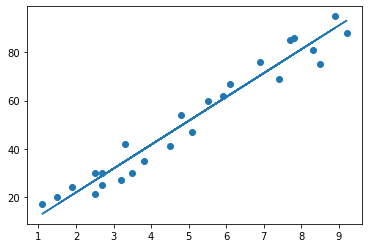

In [17]:
line = regressor.coef_*independent+regressor.intercept_

# Plotting for the test data
plt.scatter(independent, depending)
plt.plot(independent, line);
plt.show()

## Making Predictions

In [18]:
print(independent_test) # Testing data - In Hours
depending_pred = regressor.predict(independent_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
# Comparing Actual vs Predicted
diff = pd.DataFrame({'Actual': depending_test, 'Predicted': depending_pred})  
diff 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Let's Test Our Own Data :)

In [20]:
hours=[[9.25]]
own_pred = regressor.predict(hours)
print("No. of Hours = {}".format(hours[0][0]))
if own_pred[0]>100:
    print("Predicted Score = 100")
else:
    print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(depending_test, depending_pred))

Mean Absolute Error: 4.183859899002975


In [22]:
print("variance score :%2f"%regressor.score(independent_test,depending_test))

variance score :0.945491


# TASK COMPLETED :) :)